In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def euler(fx, seedx,fy, seedy, fz, seedz, sigma, rho, beta,dt, steps):
    """
    Run the euler method on a given formula

    Arguments:
    fx   -- a differential equation in form of a function f(x)
    seed -- the seed of this function x0
    dt   -- delta t as the step size for the euler method
    stop -- stopping criteria, value of value of change small enought to stop the function
            the function always calculates a minimum of 30 timesteps.
            default = 10e-5
    
    Output:
    solution -- values of X over given initial condition
    times    -- corresponding time steps
    
    """
    # initialize frame
    outx = []
    outy = []
    outz = []
    time = []
    
    # initialie first value
    x = seedx
    y = seedy
    z = seedz
    t = 0
    
    # add first value to output
    outx.append(x)
    outy.append(y)
    outz.append(z)
    time.append(t)
        
    while True:
        # calculate dy/dx
        changex = fx(x,y,z,sigma)
        changey = fy(x,y,z,rho)
        changez = fz(x,y,z,beta)
        t = t+dt
        # calculate new y
        x = x + (changex * dt)
        y = y + (changey * dt)
        z = z + (changez * dt)
        # append solution
        time.append(t)
        outx.append(x)
        outy.append(y)
        outz.append(z)
        # break if change is too small
        if t>steps:
                break
    
    return (outx, outy, outz, time)

In [3]:
def fx(x,y,z, sigma):
    x = sigma*(y-x)
    return x

def fy(x,y,z, rho):
    y = x * (rho-z)-y
    return y

def fz(x,y,z, beta):
    z = x*y-beta*z
    return z

In [54]:
# Run Euler's Method on given function with different initial conditions
outx, outy, outz, time = euler(fx, 10,
                               fy, 10,
                               fz, 10,
                               sigma = 10,
                               rho = 28,
                               beta = 8/3,
                               dt= 0.0001,
                               steps = 20)
len(outx)

200002

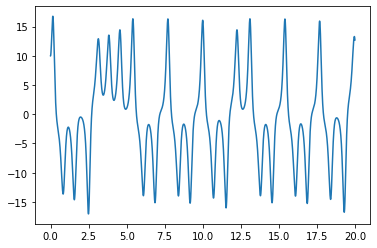

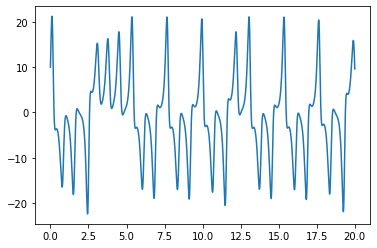

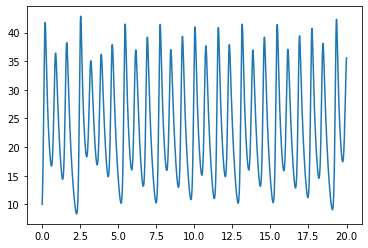

In [55]:
plt.figure()
plt.plot(time, outx)

plt.figure()
plt.plot(time, outy)

plt.figure()
plt.plot(time, outz)


Text(0.5, 0.92, ' \n My first Lorenz attractor ')

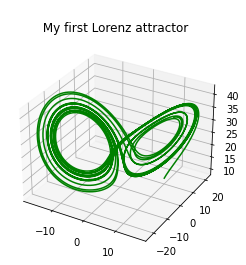

In [64]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(outx, outy, outz, color = 'green')
ax.set_title(" \n My first Lorenz attractor ")